# Twitter sentiment Analysis

https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#twitter api credentials
API_Key='GCi1oBay18iI3uc0UHqwIf0y9'
API_Secret_Key='SchuOJWzGCi7RRxR95Mg09dxrR5ZB4SYAUk8Y9jmWAqJw78GIW'
Access_Token='1309337906692067328-UVdzwVpLY4BguLGdZfoIoO4sLLSCcj'
Access_Token_Secret='UWWJ1ZKLr9L8eSwiycSveI39k4WFCHmIe5yK8S1y0C4WM'


In [3]:
#creating authentication

authenticate=tweepy.OAuthHandler(API_Key,API_Secret_Key)
authenticate.set_access_token(Access_Token,Access_Token_Secret)
api=tweepy.API(authenticate)

In [4]:
def search_by_hashtag(api,date_since, date_until, words):
    df = pd.DataFrame(columns=['id', 'created_at', 'username', 'location', 'following', 
                               'followers', 'retweetcount', 'text']) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en", wait_on_rate_limit=True,
                           since=date_since, until=date_until, tweet_mode='extended',count=1000).items() 
    list_tweets = [tweet for tweet in tweets] 
         
    for tweet in list_tweets: 
        id = tweet.id
        created_at = tweet.created_at
        username = tweet.user.screen_name 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        retweetcount = tweet.retweet_count 

        try: 
            text = tweet.retweeted_status.full_text 
        except AttributeError: 
            text = tweet.full_text 
  
        tweets = [id, created_at, username, location, following, 
                     followers, retweetcount, text] 

        df.loc[len(df)] = tweets 
          
    filename = 'tweetsofamazon.csv'
    df.to_csv(filename) 

In [ ]:

words = "#amazon"
date_since = "2021-05-19"
date_until = "2021-05-20"
search_by_hashtag(api, date_since, date_until, words)

# reading the collected data (tweets on amazon ) from twitter

In [5]:
data=pd.read_csv('tweetsofamazon.csv')

In [6]:
data

,Unnamed: 0,id,created_at,username,location,following,followers,retweetcount,text
0,0,1395167262479458308,2021-05-19 23:59:30,ChalsiD,NaN,35,12,0,Start learning winning habits TODAY! https://t...
1,1,1395167176080887822,2021-05-19 23:59:10,BrickSetSearch,Worldwide,1188,4284,0,LEGO Friends Vet Clinic Ambulance 41445 Buildi...
2,2,1395167166584999937,2021-05-19 23:59:08,Ninthusiast,Worldwide,3439,7349,0,Just Dance 2021 - #NintendoSwitch Standard Edi...
3,3,1395167121706045440,2021-05-19 23:58:57,suckitsherman,NaN,1,2,0,"since #Amazon bought #Ring in 2018, it has bro..."
4,4,1395166951031324672,2021-05-19 23:58:16,Playthusiast,Worldwide,3229,10257,0,HyperX Cloud - Official #PlayStation Licensed ...
...,...,...,...,...,...,...,...,...,...
8264,8264,1394805031329742848,2021-05-19 00:00:08,LizActivate,NaN,1962,2580,0,Breaking: #Amazon is a #CIA FRONT operation. h...
8265,8265,1394805024786632711,2021-05-19 00:00:06,ChristBookFinds,NaN,5662,5241,0,Find out which of your #Kindle books have an #...
8266,8266,1394805009976598530,2021-05-19 00:00:03,YabRock,安曇野 某所,2261,2571,0,Collection (Best of) / #YngwieMalmsteen https:...
8267,8267,1394805003856990209,2021-05-19 00:00:01,elizabethk_llc,NaN,898,649,0,I sit and reflect often. I look forward to sha...


In [7]:
df=data[['text']]

In [8]:
df.shape

(8269, 1)

In [9]:
df=df.drop_duplicates(ignore_index=True)

In [10]:
df.shape

(4953, 1)

In [11]:
df.head(10)

,text
0,Start learning winning habits TODAY! https://t...
1,LEGO Friends Vet Clinic Ambulance 41445 Buildi...
2,Just Dance 2021 - #NintendoSwitch Standard Edi...
3,"since #Amazon bought #Ring in 2018, it has bro..."
4,HyperX Cloud - Official #PlayStation Licensed ...
5,"Pre-save my new album ""Haystack Needle, Pt. 1""..."
6,#NowPlaying Lil Baby - We Paid (feat. 42 Dugg...
7,SECOND GIVEAWAY IS LIVE🎊🎊🎊\nCLICK LINK IN COMM...
8,I'm very happy to share this study which I was...
9,@Elsinbama It is for employees returning to th...


# Preprocessing and cleaning the data

In [12]:
import re
import nltk
from nltk.tokenize import sent_tokenize as st,word_tokenize as wt
from nltk.corpus import stopwords
list_of_stopwords=stopwords.words('English')


In [13]:


signs = ['@', '#', '!', '%',]+['.', '&','*','/','$','₹','`','~']+[ '(', "|", ',', "-", "+", "=", "^", "//",  "?" , ")", ":"] 
digits=['0','1','2','3','4','5','6','7','8','9','2018','2019','2020','2021']      

In [14]:
def cleantext(text):
    text=re.sub('@[A-Za-z0-9]+','',text)
    text=re.sub('#','',text)
    text=re.sub('RT[\S]+','',text)                     #removing retweets
    text=re.sub('https?:\/\/\S+','',text)              #removing http links
    
    current_text_list=wt(text)
    cleantext=" "
    for i in current_text_list:
        i=i.lower()
        if not i in list_of_stopwords:
                if not i in signs:
                    if not i in digits:
                        cleantext = cleantext +i+" "
    return text

In [15]:
df['clean_tweets']=df['text'].apply(cleantext)

In [16]:
df

,text,clean_tweets
0,Start learning winning habits TODAY! https://t...,Start learning winning habits TODAY! \nmustrea...
1,LEGO Friends Vet Clinic Ambulance 41445 Buildi...,LEGO Friends Vet Clinic Ambulance 41445 Buildi...
2,Just Dance 2021 - #NintendoSwitch Standard Edi...,Just Dance 2021 - NintendoSwitch Standard Edit...
3,"since #Amazon bought #Ring in 2018, it has bro...","since Amazon bought Ring in 2018, it has broke..."
4,HyperX Cloud - Official #PlayStation Licensed ...,HyperX Cloud - Official PlayStation Licensed G...
...,...,...
4948,Breaking: #Amazon is a #CIA FRONT operation. h...,Breaking: Amazon is a CIA FRONT operation.
4949,Find out which of your #Kindle books have an #...,Find out which of your Kindle books have an Au...
4950,Collection (Best of) / #YngwieMalmsteen https:...,Collection (Best of) / YngwieMalmsteen HardRo...
4951,I sit and reflect often. I look forward to sha...,I sit and reflect often. I look forward to sha...


In [17]:
analysis=TextBlob('today was an amazing day')
analysis.sentiment

Sentiment(polarity=0.6000000000000001, subjectivity=0.9)

In [18]:
analysis=TextBlob('today was worst day in my life')
analysis.sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [19]:
#function to get subjectivity and polarity from each tweet in the data
def getsubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity
def getpolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [20]:
df['subjectivity']=df['clean_tweets'].apply(getsubjectivity)

In [21]:
df['polarity']=df['clean_tweets'].apply(getpolarity)

In [22]:
df

,text,clean_tweets,subjectivity,polarity
0,Start learning winning habits TODAY! https://t...,Start learning winning habits TODAY! \nmustrea...,0.750000,0.625000
1,LEGO Friends Vet Clinic Ambulance 41445 Buildi...,LEGO Friends Vet Clinic Ambulance 41445 Buildi...,0.800000,-0.500000
2,Just Dance 2021 - #NintendoSwitch Standard Edi...,Just Dance 2021 - NintendoSwitch Standard Edit...,0.000000,0.000000
3,"since #Amazon bought #Ring in 2018, it has bro...","since Amazon bought Ring in 2018, it has broke...",0.250000,0.250000
4,HyperX Cloud - Official #PlayStation Licensed ...,HyperX Cloud - Official PlayStation Licensed G...,0.616667,0.116667
...,...,...,...,...
4948,Breaking: #Amazon is a #CIA FRONT operation. h...,Breaking: Amazon is a CIA FRONT operation.,0.000000,0.000000
4949,Find out which of your #Kindle books have an #...,Find out which of your Kindle books have an Au...,0.000000,0.000000
4950,Collection (Best of) / #YngwieMalmsteen https:...,Collection (Best of) / YngwieMalmsteen HardRo...,0.300000,1.000000
4951,I sit and reflect often. I look forward to sha...,I sit and reflect often. I look forward to sha...,0.575000,0.387500


# word cloud visualization

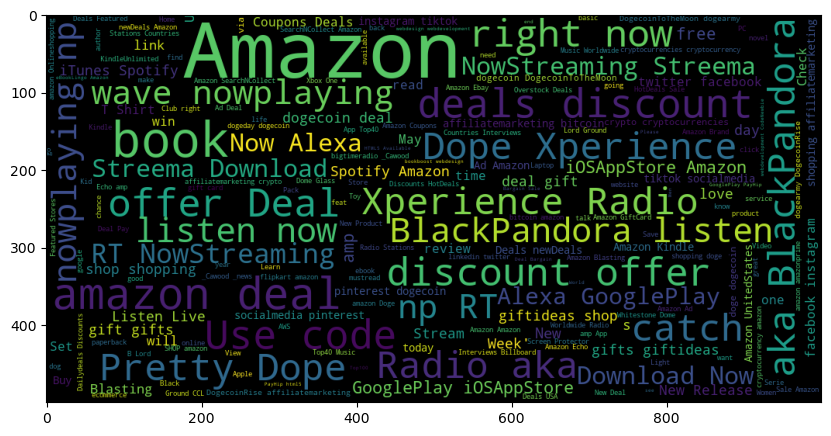

In [24]:
#word cloud visualization
from wordcloud import WordCloud
allwords=''.join([i for i in df['clean_tweets']])
cloud=WordCloud(width=1000,height=500,random_state=42,max_font_size=100).generate(allwords)

plt.figure(figsize=(10, 8), dpi=100)
plt.imshow(cloud)
plt.show()


In [25]:
#function to divide tweets into subgroups using polarity
def reviews(x):
    if x<0:
        return 'Negative'
    elif x==0:
        return 'Neutral'
    else:
        return 'Positive'

In [26]:
df['reviews']=df['polarity'].apply(reviews)

In [27]:
df

,text,clean_tweets,subjectivity,polarity,reviews
0,Start learning winning habits TODAY! https://t...,Start learning winning habits TODAY! \nmustrea...,0.750000,0.625000,Positive
1,LEGO Friends Vet Clinic Ambulance 41445 Buildi...,LEGO Friends Vet Clinic Ambulance 41445 Buildi...,0.800000,-0.500000,Negative
2,Just Dance 2021 - #NintendoSwitch Standard Edi...,Just Dance 2021 - NintendoSwitch Standard Edit...,0.000000,0.000000,Neutral
3,"since #Amazon bought #Ring in 2018, it has bro...","since Amazon bought Ring in 2018, it has broke...",0.250000,0.250000,Positive
4,HyperX Cloud - Official #PlayStation Licensed ...,HyperX Cloud - Official PlayStation Licensed G...,0.616667,0.116667,Positive
...,...,...,...,...,...
4948,Breaking: #Amazon is a #CIA FRONT operation. h...,Breaking: Amazon is a CIA FRONT operation.,0.000000,0.000000,Neutral
4949,Find out which of your #Kindle books have an #...,Find out which of your Kindle books have an Au...,0.000000,0.000000,Neutral
4950,Collection (Best of) / #YngwieMalmsteen https:...,Collection (Best of) / YngwieMalmsteen HardRo...,0.300000,1.000000,Positive
4951,I sit and reflect often. I look forward to sha...,I sit and reflect often. I look forward to sha...,0.575000,0.387500,Positive


In [28]:
df['reviews'].value_counts()

Positive    2716
Neutral     1719
Negative     518
Name: reviews, dtype: int64

In [29]:
df.shape

(4953, 5)

In [30]:
print(f" the no. of rows in the data are {df.shape[0]} and the coumns are {df.shape[1]}")

 the no. of rows in the data are 4953 and the coumns are 5


<AxesSubplot:>

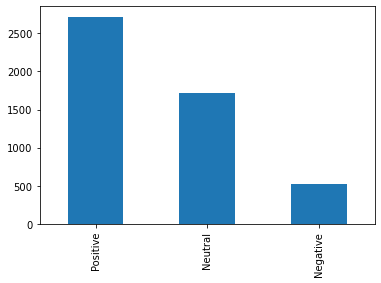

In [31]:
df['reviews'].value_counts().plot(kind='bar')

In [76]:
#print('negative tweets are')

#n=df['clean_tweets'][df['polarity']<0]
#n=list(n)
#for i in range(0,len(n)):
    #print(str(i+1)+')'+n[i]+'\n')

# splitting the data for training

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
cv=CountVectorizer()

In [35]:
cv.fit_transform(df['clean_tweets'])

<4953x16380 sparse matrix of type '<class 'numpy.int64'>'
	with 110049 stored elements in Compressed Sparse Row format>

In [36]:
sparse_matrix=cv.fit_transform(df['clean_tweets'])

In [37]:
x=sparse_matrix
y=df['reviews']

In [38]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,stratify=y,random_state=42)

In [39]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3962, 16380), (991, 16380), (3962,), (991,))

# Naive Bayes Algorithm:

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [41]:
nb.fit(x_train,y_train)

MultinomialNB()

In [42]:
nb_pred=nb.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score as score,classification_report as creport

In [44]:
print(" accuracy score of naive bayes is :", score(y_test,nb_pred))

 accuracy score of naive bayes is : 0.7184661957618567


In [45]:
print(creport(y_test,nb_pred))

              precision    recall  f1-score   support

    Negative       0.45      0.40      0.43       104
     Neutral       0.69      0.67      0.68       344
    Positive       0.78      0.81      0.79       543

    accuracy                           0.72       991
   macro avg       0.64      0.63      0.63       991
weighted avg       0.71      0.72      0.72       991



# Random Forest Classifier Algorithm:

In [46]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [47]:
random_forest=RFC(class_weight='balanced')

In [48]:
%%time
random_forest.fit(x_train,y_train)

Wall time: 18.5 s


RandomForestClassifier(class_weight='balanced')

In [49]:
random_pred=random_forest.predict(x_test)

In [50]:
print(" accuracy score of randomforest is :",score(random_pred,y_test))

 accuracy score of randomforest is : 0.8153380423814329


In [63]:
print(creport(random_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.26      0.90      0.40        30
     Neutral       0.90      0.74      0.81       419
    Positive       0.87      0.87      0.87       542

    accuracy                           0.82       991
   macro avg       0.68      0.84      0.69       991
weighted avg       0.86      0.82      0.83       991



# Support Vector Machine (SVM) Algorithm:

In [51]:
%%time
from sklearn import svm
svm_model=svm.LinearSVC(random_state=24)
svm_model.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)


Wall time: 977 ms


In [52]:
print("accuracy score of svm is:",score(svm_pred,y_test))

accuracy score of svm is: 0.8536831483350151


In [64]:
print(creport(svm_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.51      0.72      0.60        74
     Neutral       0.91      0.80      0.85       392
    Positive       0.88      0.91      0.90       525

    accuracy                           0.85       991
   macro avg       0.77      0.81      0.78       991
weighted avg       0.87      0.85      0.86       991



# K Neighbors Classifier Algorithm:

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)
knn_pred=knn_model.predict(x_test)

In [54]:
print("accuracy score of KNN is: ",score(knn_pred,y_test))

accuracy score of KNN is:  0.6559031281533805


In [65]:
print(creport(knn_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.22      0.47      0.30        49
     Neutral       0.91      0.53      0.67       596
    Positive       0.58      0.91      0.71       346

    accuracy                           0.66       991
   macro avg       0.57      0.63      0.56       991
weighted avg       0.76      0.66      0.66       991



# Logistic Regression Algorithm:

In [55]:
from sklearn.linear_model import LogisticRegression as LR
lr=LR()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

C:\Users\ILIYAZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
print("accuracy score of logistic regression is: ",score(lr_pred,y_test))

accuracy score of logistic regression is:  0.8456104944500504


In [66]:
print(creport(lr_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.43      0.76      0.55        59
     Neutral       0.90      0.79      0.84       390
    Positive       0.89      0.89      0.89       542

    accuracy                           0.85       991
   macro avg       0.74      0.82      0.76       991
weighted avg       0.87      0.85      0.85       991



# Passive Aggressive Classifier Algorithm:

In [58]:
from sklearn.linear_model import PassiveAggressiveClassifier
model_pas = PassiveAggressiveClassifier()
model_pas.fit(x_train,y_train)
pac_pred = model_pas.predict(x_test)


In [59]:
print("accuracy score of passive aggressive classifier is: ",score(pac_pred,y_test))

accuracy score of passive aggressive classifier is:  0.8486377396569122


In [67]:
print(creport(pac_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.49      0.71      0.58        72
     Neutral       0.89      0.81      0.85       380
    Positive       0.89      0.90      0.89       539

    accuracy                           0.85       991
   macro avg       0.76      0.80      0.77       991
weighted avg       0.86      0.85      0.85       991



# Ensemble model:

In [60]:
from sklearn.ensemble import VotingClassifier

estimators = []
estimators.append(('LR', 
                  LR()))
estimators.append(('NB', MultinomialNB()))


vc = VotingClassifier(estimators=estimators,voting='soft')
vc.fit(x_train,y_train)
pred_vc = vc.predict(x_test)


C:\Users\ILIYAZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
print("accuracy score of passive aggressive classifier is: ",score(pred_vc,y_test))

accuracy score of passive aggressive classifier is:  0.7739656912209889


In [68]:
print(creport(pred_vc,y_test))

              precision    recall  f1-score   support

    Negative       0.38      0.57      0.46        70
     Neutral       0.76      0.74      0.75       354
    Positive       0.85      0.82      0.84       567

    accuracy                           0.77       991
   macro avg       0.67      0.71      0.68       991
weighted avg       0.79      0.77      0.78       991



# Decision Tree Classifier Algorithm:

In [69]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [71]:
decision_model=DTC(class_weight='balanced')

In [72]:
decision_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [73]:
decision_pred=decision_model.predict(x_test)

In [74]:
print('accuracy score of decision tree is:',score(decision_pred,y_test))

accuracy score of decision tree is: 0.786074672048436


In [75]:
print(creport(decision_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.49      0.47      0.48       109
     Neutral       0.83      0.77      0.80       370
    Positive       0.81      0.86      0.84       512

    accuracy                           0.79       991
   macro avg       0.71      0.70      0.71       991
weighted avg       0.78      0.79      0.78       991

